<a href="https://colab.research.google.com/github/yasarsultan/Ecommerce-Data-Analysis/blob/main/Yasar_Sultan_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Algorithm

## Importing required libraries

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


## Loading and merging data

In [ ]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')
products = pd.read_csv('Products.csv')

transactions = transactions.merge(products, on='ProductID')
transactions = transactions.merge(customers, on='CustomerID')

## Feature Engineering

In [ ]:
customer_summary = transactions.groupby('CustomerID').agg(
    frequency=("TransactionID", "count"),
    total_spent=("TotalValue", "sum"),
    unique_categories=("Category", 'nunique')
).reset_index()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_summary[["frequency", "total_spent", "unique_categories"]])


## Exploring combination of clusters

In [ ]:
# Determining optimal no.of clusters by trying all possible no.of clusters
inertia = []
db_scores = []
silhouette_scores = []

clusters_range = range(2, 10+1)
for k in clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    db_scores.append(davies_bouldin_score(scaled_features, kmeans.labels_))
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))


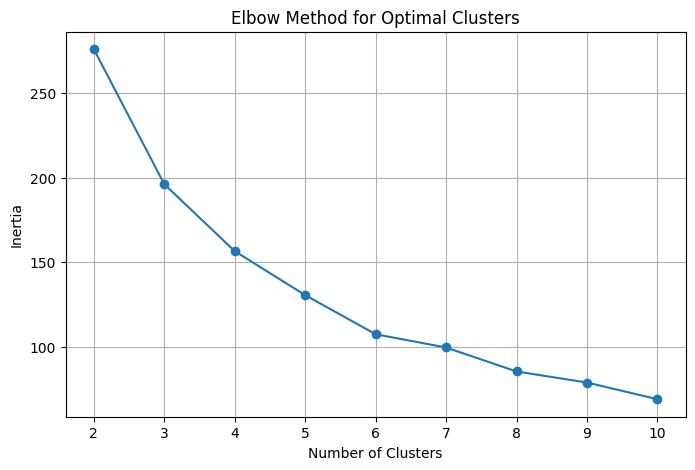

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(clusters_range, inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

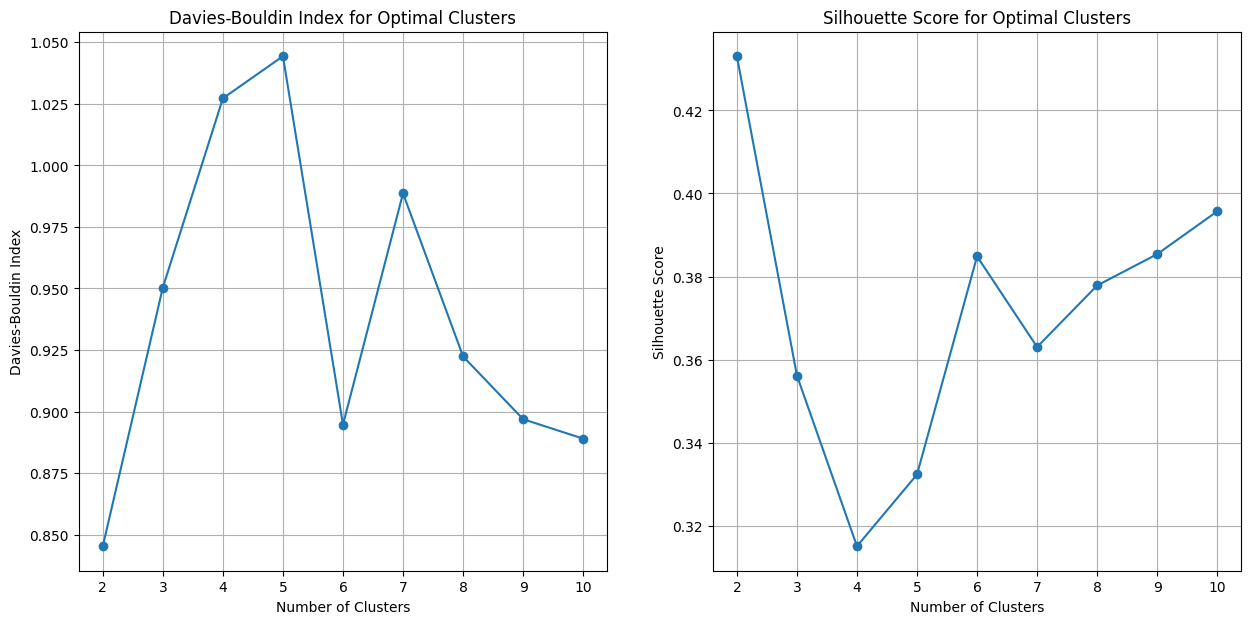

In [ ]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(clusters_range, db_scores, marker='o')
plt.title("Davies-Bouldin Index for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin Index")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(clusters_range, silhouette_scores, marker='o')
plt.title("Silhouette Score for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)

plt.show()

In [ ]:
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_summary["Cluster"] = kmeans.fit_predict(scaled_features)

db_index = davies_bouldin_score(scaled_features, customer_summary["Cluster"])
silhouette_avg = silhouette_score(scaled_features, customer_summary['Cluster'])

print("DB Index:", db_index)
print("Silhouette Score:", silhouette_avg)

DB Index: 0.8453031130942839
Silhouette Score: 0.4330491148447007


## Performing Data Visualization of clusters

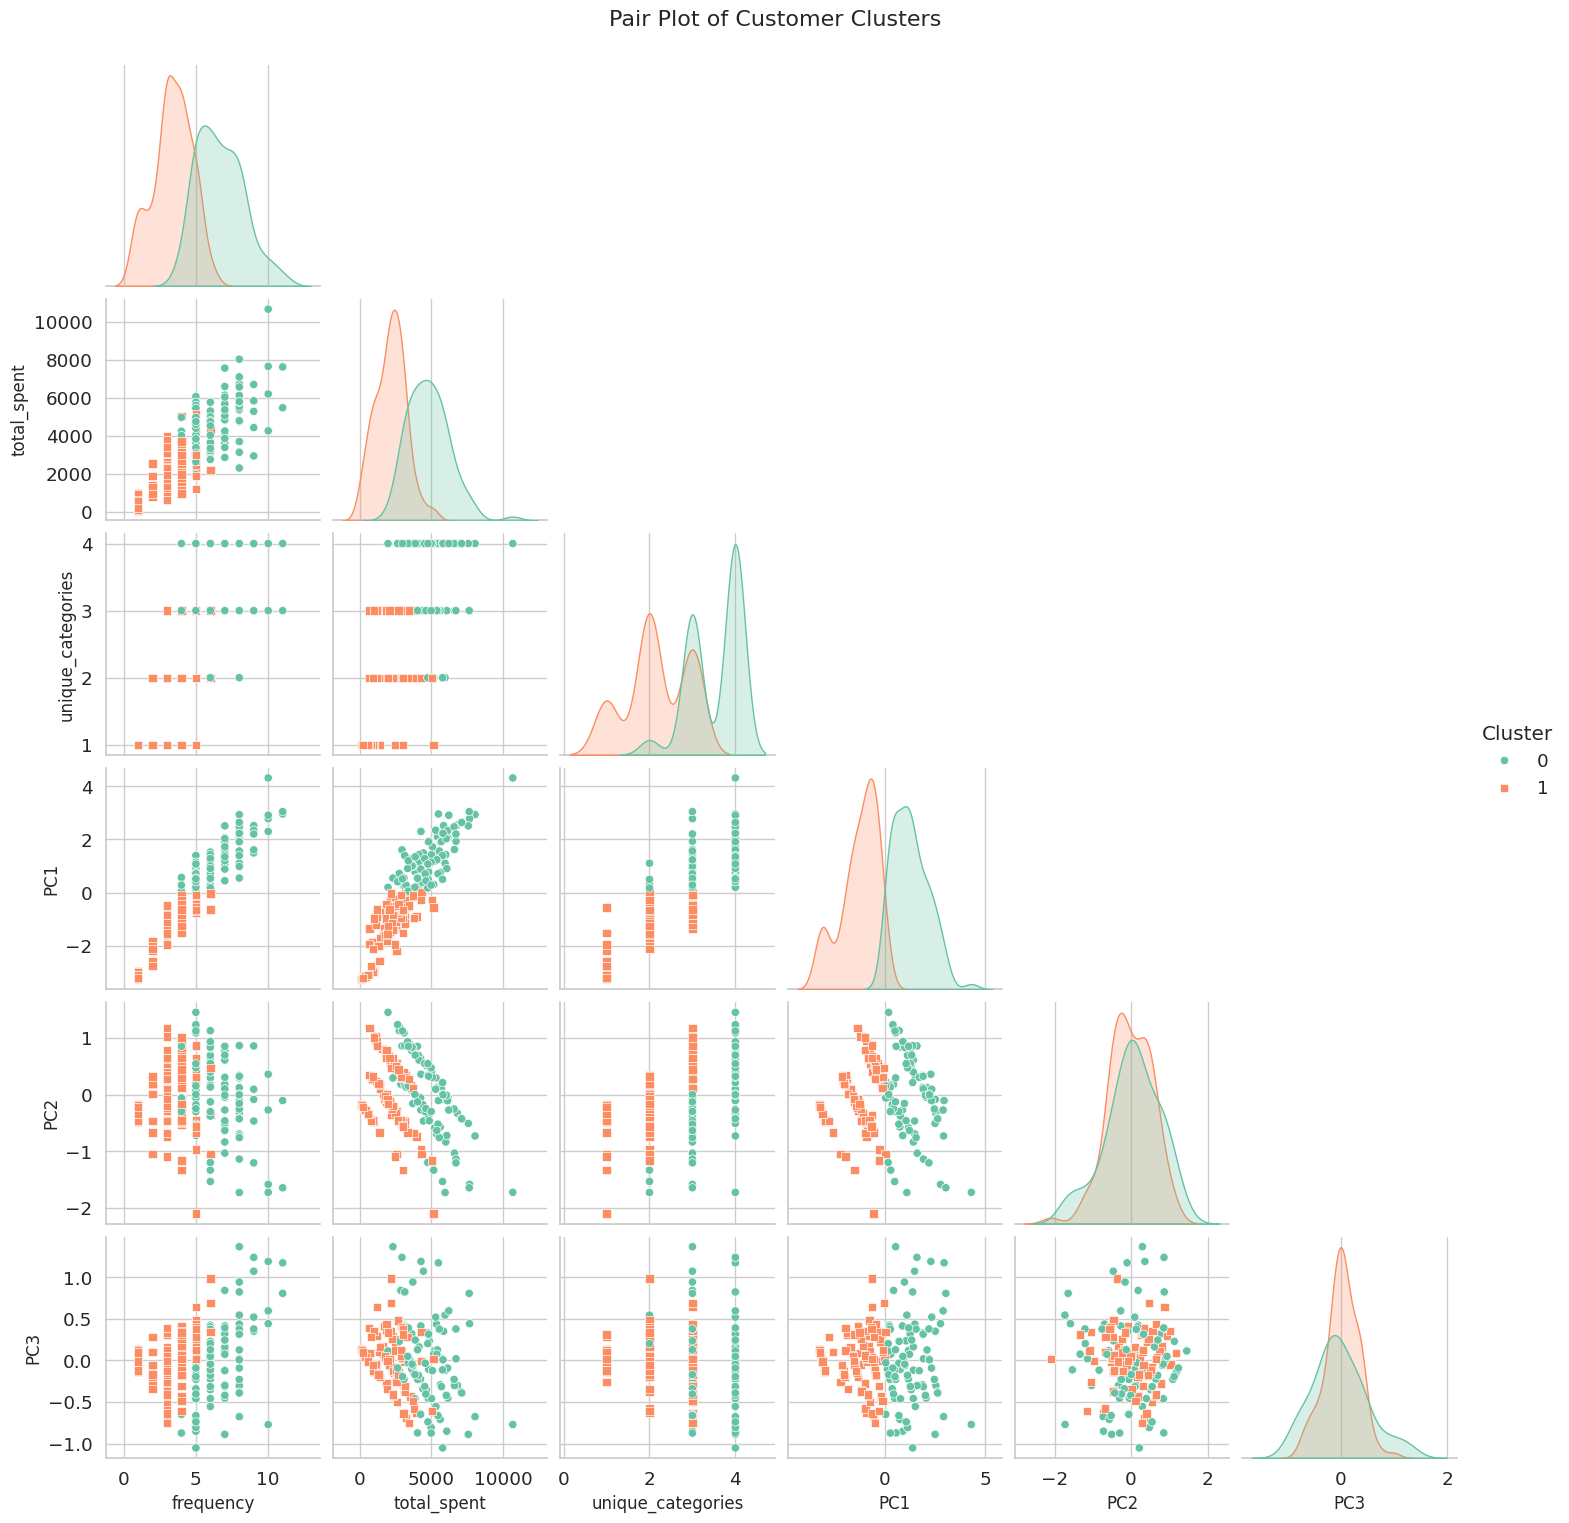

In [ ]:
sns.set(style='whitegrid', font_scale=1.2)
pair_plot = sns.pairplot(
    customer_summary,
    hue='Cluster',
    diag_kind='kde',
    palette='Set2',
    markers=['o', 's'],
    corner=True,
)

pair_plot.fig.suptitle("Pair Plot of Customer Clusters", y=1.02, fontsize=16)  # Title
for ax in pair_plot.axes.flat:
    if ax:
        ax.set_xlabel(ax.get_xlabel(), fontsize=12)
        ax.set_ylabel(ax.get_ylabel(), fontsize=12)

plt.show()


In [ ]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_features)
customer_summary["PC1"] = principal_components[:, 0]
customer_summary["PC2"] = principal_components[:, 1]
customer_summary["PC3"] = principal_components[:, 2]

In [ ]:
fig = px.scatter_3d(
    customer_summary,
    x="PC1",
    y="PC2",
    z="PC3",
    color="Cluster",
    title="3D Visualization of Clusters",
    labels={'Cluster': 'Cluster'},
    opacity=0.7
)

fig.show()
